# **Predicting Housing Prices Using Linear Regression in Python**

# **Step 1: Setting Up**
First, we need to import the necessary libraries for data handling, machine learning, and visualization.

In [9]:
# Importing necessary libraries
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# **Step 2: Downloading the Dataset**
I used kagglehub to download the latest version of the housing dataset. This allows us to easily access the data we need.

In [10]:
# Downloading the latest dataset using kagglehub
path = kagglehub.dataset_download("huyngohoang/housingcsv")
print("Path to dataset files:", path)


100%|██████████| 280k/280k [00:00<00:00, 40.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/huyngohoang/housingcsv/versions/1


# **Step 3: Loading the Dataset**
After downloading the dataset, I loaded it into a pandas DataFrame to begin exploration and analysis.

In [11]:
# Loading the dataset
df = pd.read_csv(f"{path}/housing.csv")  # Adjust the path if necessary
print("Dataset Loaded Successfully.")
df.head()  # Displaying the first few rows of the dataset


Dataset Loaded Successfully.


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


# **Step 4: Exploring the Data**
It’s important to understand the data structure. Here, I checked for missing values and reviewed the data types.

In [12]:
# Checking for missing values and data types
print(df.isnull().sum())  # Count of missing values in each column
print(df.dtypes)          # Data types of each column


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object


# Step 5: Data Preprocessing
Next, I handled any irrelevant columns and encoded categorical variables to prepare the data for modeling.

In [14]:
df.drop(['Address'], axis=1, inplace=True)  # Dropping the Address column for simplicity


# **Step 6: Defining Features and Target Variable**
I defined the feature set (X) and the target variable (y) for the regression model. In this case, the target is the housing price.

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
         'Avg. Area Number of Bedrooms', 'Area Population']]  # Features
y = df['Price']  # Target variable

# **Step 7: Splitting Data**
I split the data into training and testing sets to evaluate the model's performance effectively.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Training the Model**
With the data ready, I trained a linear regression model using the training data.

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Step 9: Making Predictions**
After training, I made predictions on the test set to see how well the model performs.

In [19]:
y_pred = model.predict(X_test)

# **Step 10: Evaluating the Model**
I calculated the Mean Squared Error (MSE) to evaluate the model's accuracy.

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10089009299.499458


# **Step 11: Visualizing Results**
Finally, I visualized the predicted prices against the actual prices to assess the model's performance.

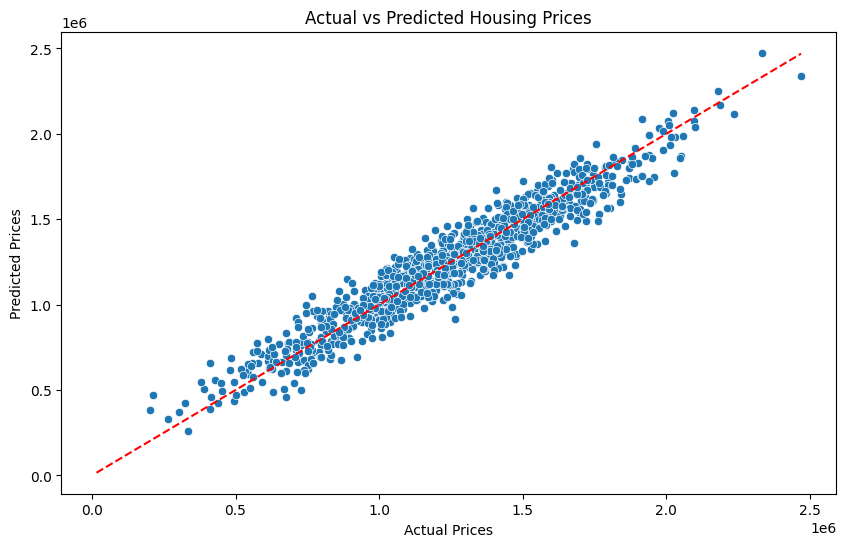

In [21]:
# Visualizing predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Diagonal line for reference
plt.show()
